In [1]:
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd

import random


In [2]:
dataset = pd.read_csv('Delhi.csv',usecols=['Price','Area','Location','No. of Bedrooms','CarParking'])

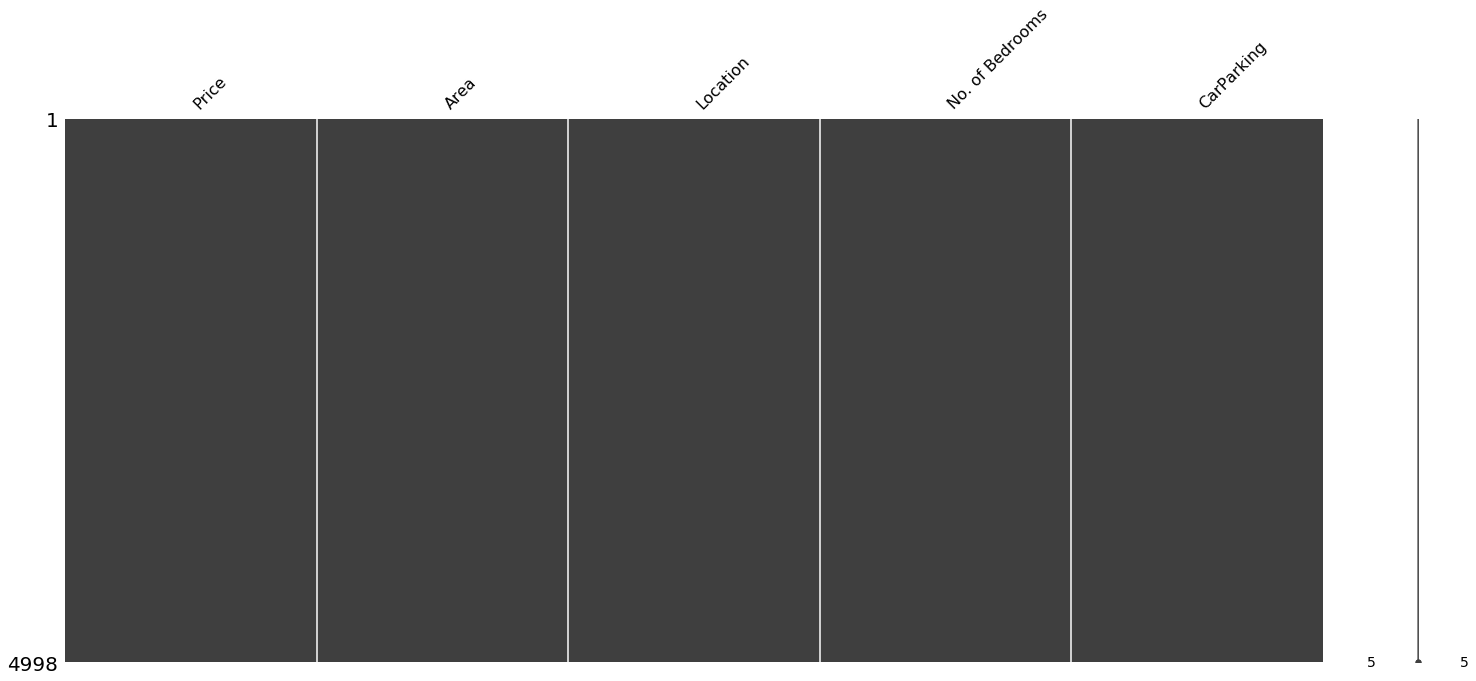

In [3]:
import missingno
missingno.matrix(dataset)

In [3]:
dataset['CarParking'].value_counts()

9    2996
0    1522
1     480
Name: CarParking, dtype: int64

In [4]:
dataset['CarParking'] = dataset['CarParking'].apply(lambda x:random.choice([1,0]) if x==9 else x)

In [5]:
location_stats = dataset.groupby('Location')['Location'].agg('count').sort_values(ascending = False)
location_stats_less_than_50 = location_stats[location_stats<=50]
dataset['Location'] = dataset['Location'].apply(lambda x:'other' if x in location_stats_less_than_50 else x)
dummies = pd.get_dummies(dataset['Location'])
dataset = pd.concat([dataset,dummies.drop('other',axis='columns')],axis=1)
dataset.head()

,Price,Area,Location,No. of Bedrooms,CarParking,Alaknanda,Burari,Chattarpur,Delhi,Dwarka Mor,...,Sector 10 Dwarka,Sector 11 Dwarka,Sector 12 Dwarka,Sector 19 Dwarka,Sector 22 Dwarka,Sector 4 Dwarka,Sector 5 Dwarka,Sector 6 Dwarka,Uttam Nagar,Vasant Kunj
0,10500000,1200,Sector 10 Dwarka,2,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,6000000,1000,Uttam Nagar,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,15000000,1350,Sarita Vihar,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2500000,435,Uttam Nagar,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,5800000,900,Dwarka Mor,3,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [6]:
dataset.drop(['Location'],inplace=True, axis=1)

In [7]:
dataset['Price1']=dataset['Price']
dataset.drop(["Price"],inplace=True,axis=1)

In [8]:
from sklearn.model_selection import train_test_split
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=1/3,random_state=0)

In [9]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

In [10]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
y_pred=reg.predict(X_test)

In [12]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.1791292146717286

In [13]:
import pickle

with open('delhi_model.pickle','wb') as f:
    pickle.dump(reg,f)

In [14]:
import json
columns = {
    'data_columns':[col.lower() for col in X.columns]
}
with open("delhi_columns.json","w") as f:
    f.write(json.dumps(columns))

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

C:\Users\deepg\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('Delhi.csv',usecols=['Price','Area','Location','No. of Bedrooms','CarParking'])

In [3]:
location_stats = df.groupby('Location')['Location'].agg('count').sort_values(ascending = False)

In [4]:
location_stats

Location
Noida                 761
Uttam Nagar           430
Dwarka Mor            347
Vasant Kunj           263
Burari                144
                     ... 
New Friends Colony      1
Nasirpur                1
Naraina Vihar           1
Naraina                 1
1 Lane Johri Farm       1
Name: Location, Length: 339, dtype: int64

In [5]:
location_stats_less_than_50 = location_stats[location_stats<=50]

In [6]:
location_stats_less_than_50

Location
Sector 24 Rohini      50
New Ashok Nagar       47
Dwarka More           44
Sector 13 Dwarka      44
Bindapur              43
                      ..
New Friends Colony     1
Nasirpur               1
Naraina Vihar          1
Naraina                1
1 Lane Johri Farm      1
Name: Location, Length: 319, dtype: int64

In [7]:
df['Location'] = df['Location'].apply(lambda x:'other' if x in location_stats_less_than_50 else x)

<AxesSubplot:>

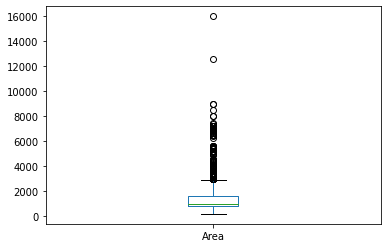

In [8]:
df['Area'].plot(kind='box')

In [9]:
df['CarParking'] = df['CarParking'].apply(lambda x:random.choice([1,0]) if x==9 else x)

In [10]:
dummies = pd.get_dummies(df['Location'])
df = pd.concat([df,dummies.drop('other',axis='columns')],axis=1)

In [11]:
df.drop('Location',axis=1,inplace=True)

In [12]:
df['Area'] = df['Area'].astype('float')

In [13]:
df['Price'] = df['Price']/100000

In [14]:
X = df.drop(['Price'],axis=1)
y = df['Price']

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state=0)

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.20046605706902798

In [19]:
def predict_price(location,sqft,cp,bhk):
    loc_index = np.where(X.columns == location)[0][0]
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bhk
    x[2] = cp
    
    if loc_index >=0:
        x[loc_index] = 1
    return lr_clf.predict([x])[0]

In [21]:
predict_price('Alaknanda',720,1,1)

113.49071743032526

In [20]:
df.head(2)

,Price,Area,No. of Bedrooms,CarParking,Alaknanda,Burari,Chattarpur,Delhi,Dwarka Mor,Greater Kailash,...,Sector 10 Dwarka,Sector 11 Dwarka,Sector 12 Dwarka,Sector 19 Dwarka,Sector 22 Dwarka,Sector 4 Dwarka,Sector 5 Dwarka,Sector 6 Dwarka,Uttam Nagar,Vasant Kunj
0,105.0,1200.0,2,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,60.0,1000.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [23]:
import pickle

with open('delhi_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [24]:
import json
columns = {
    'data_columns':[col.lower() for col in X.columns]
}
with open("delhi_columns.json","w") as f:
    f.write(json.dumps(columns))